<a href="https://colab.research.google.com/github/rachmazamalia/Capstone-Project/blob/main/Fruit_Vege_Detection_V2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **DATA PREPARATION**

In [1]:
!pip install kaggle -q

In [2]:
!mkdir ~/.kaggle

In [3]:
!cp kaggle.json ~/.kaggle/

In [4]:
!chmod 600 ~/.kaggle/kaggle.json

In [5]:
import os
from glob import glob
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from IPython.display import Image
from PIL import Image
import random

In [6]:
# Download Dataset 1
!kaggle datasets download -d alibaloch/vegetables-fruits-fresh-and-stale
# Download Dataset 2
!kaggle datasets download -d shivanir23/good-and-bad-fruits-ieee-extended

100% 984M/986M [00:06<00:00, 164MB/s]
100% 986M/986M [00:06<00:00, 168MB/s]
 99% 201M/202M [00:01<00:00, 142MB/s]
100% 202M/202M [00:01<00:00, 133MB/s]


In [7]:
!mkdir dataset
!mkdir dataset/train
!mkdir dataset/test

**DATASET 1**

In [8]:
!unzip -j -q vegetables-fruits-fresh-and-stale.zip "dataset/train/freshapples/*" -d "dataset/train/freshapples"
!unzip -j -q vegetables-fruits-fresh-and-stale.zip "dataset/train/freshbanana/*" -d "dataset/train/freshbanana"
!unzip -j -q vegetables-fruits-fresh-and-stale.zip "dataset/train/freshcucumber/*" -d "dataset/train/freshcucumber"
!unzip -j -q vegetables-fruits-fresh-and-stale.zip "dataset/train/freshokra/*" -d "dataset/train/freshokra"
!unzip -j -q vegetables-fruits-fresh-and-stale.zip "dataset/train/freshpatato/*" -d "dataset/train/freshpotato"
!unzip -j -q vegetables-fruits-fresh-and-stale.zip "dataset/train/freshtamto/*" -d "dataset/train/freshtomato"
!unzip -j -q vegetables-fruits-fresh-and-stale.zip "dataset/train/rottenapples/*" -d "dataset/train/rottenapples"
!unzip -j -q vegetables-fruits-fresh-and-stale.zip "dataset/train/rottenbanana/*" -d "dataset/train/rottenbanana"
!unzip -j -q vegetables-fruits-fresh-and-stale.zip "dataset/train/rottencucumber/*" -d "dataset/train/rottencucumber"
!unzip -j -q vegetables-fruits-fresh-and-stale.zip "dataset/train/rottenokra/*" -d "dataset/train/rottenokra"
!unzip -j -q vegetables-fruits-fresh-and-stale.zip "dataset/train/rottenpatato/*" -d "dataset/train/rottenpotato"
!unzip -j -q vegetables-fruits-fresh-and-stale.zip "dataset/train/rottentamto/*" -d "dataset/train/rottentomato"

In [9]:
!unzip -j -q vegetables-fruits-fresh-and-stale.zip "dataset/test/freshapples/*" -d "dataset/test/freshapples"
!unzip -j -q vegetables-fruits-fresh-and-stale.zip "dataset/test/freshbanana/*" -d "dataset/test/freshbanana"
!unzip -j -q vegetables-fruits-fresh-and-stale.zip "dataset/test/freshcucumber/*" -d "dataset/test/freshcucumber"
!unzip -j -q vegetables-fruits-fresh-and-stale.zip "dataset/test/freshokra/*" -d "dataset/test/freshokra"
!unzip -j -q vegetables-fruits-fresh-and-stale.zip "dataset/test/freshpatato/*" -d "dataset/test/freshpotato"
!unzip -j -q vegetables-fruits-fresh-and-stale.zip "dataset/test/freshtamto/*" -d "dataset/test/freshtomato"
!unzip -j -q vegetables-fruits-fresh-and-stale.zip "dataset/test/rottenapples/*" -d "dataset/test/rottenapples"
!unzip -j -q vegetables-fruits-fresh-and-stale.zip "dataset/test/rottenbanana/*" -d "dataset/test/rottenbanana"
!unzip -j -q vegetables-fruits-fresh-and-stale.zip "dataset/test/rottencucumber/*" -d "dataset/test/rottencucumber"
!unzip -j -q vegetables-fruits-fresh-and-stale.zip "dataset/test/rottenokra/*" -d "dataset/test/rottenokra"
!unzip -j -q vegetables-fruits-fresh-and-stale.zip "dataset/test/rottenpatato/*" -d "dataset/test/rottenpotato"
!unzip -j -q vegetables-fruits-fresh-and-stale.zip "dataset/test/rottentamto/*" -d "dataset/test/rottentomato"

**DATASET 2**

In [10]:
!unzip -j -q good-and-bad-fruits-ieee-extended "IEEEFRUITSDATA_test&train/train/Guava_Good/*" -d "dataset/train/freshguava"
!unzip -j -q good-and-bad-fruits-ieee-extended "IEEEFRUITSDATA_test&train/train/Lime_Good/*" -d "dataset/train/freshlime"
!unzip -j -q good-and-bad-fruits-ieee-extended "IEEEFRUITSDATA_test&train/train/Orange_Good/*" -d "dataset/train/freshorange"
!unzip -j -q good-and-bad-fruits-ieee-extended "IEEEFRUITSDATA_test&train/train/Pomegranate_Good/*" -d "dataset/train/freshpomegranate"
!unzip -j -q good-and-bad-fruits-ieee-extended "IEEEFRUITSDATA_test&train/train/Guava_Bad/*" -d "dataset/train/rottenguava"
!unzip -j -q good-and-bad-fruits-ieee-extended "IEEEFRUITSDATA_test&train/train/Lime_Bad/*" -d "dataset/train/rottenlime"
!unzip -j -q good-and-bad-fruits-ieee-extended "IEEEFRUITSDATA_test&train/train/Orange_Bad/*" -d "dataset/train/rottenorange"
!unzip -j -q good-and-bad-fruits-ieee-extended "IEEEFRUITSDATA_test&train/train/Pomegranate_Bad/*" -d "dataset/train/rottenpomegranate"

In [11]:
!unzip -j -q good-and-bad-fruits-ieee-extended "IEEEFRUITSDATA_test&train/test/Guava_Good/*" -d "dataset/test/freshguava"
!unzip -j -q good-and-bad-fruits-ieee-extended "IEEEFRUITSDATA_test&train/test/Lime_Good/*" -d "dataset/test/freshlime"
!unzip -j -q good-and-bad-fruits-ieee-extended "IEEEFRUITSDATA_test&train/test/Orange_Good/*" -d "dataset/test/freshorange"
!unzip -j -q good-and-bad-fruits-ieee-extended "IEEEFRUITSDATA_test&train/test/Pomegranate_Good/*" -d "dataset/test/freshpomegranate"
!unzip -j -q good-and-bad-fruits-ieee-extended "IEEEFRUITSDATA_test&train/test/Guava_Bad/*" -d "dataset/test/rottenguava"
!unzip -j -q good-and-bad-fruits-ieee-extended "IEEEFRUITSDATA_test&train/test/Lime_Bad/*" -d "dataset/test/rottenlime"
!unzip -j -q good-and-bad-fruits-ieee-extended "IEEEFRUITSDATA_test&train/test/Orange_Bad/*" -d "dataset/test/rottenorange"
!unzip -j -q good-and-bad-fruits-ieee-extended "IEEEFRUITSDATA_test&train/test/Pomegranate_Bad/*" -d "dataset/test/rottenpomegranate"

In [12]:
class_names = sorted(os.listdir('dataset/train/'))
print(class_names)

['freshapples', 'freshbanana', 'freshcucumber', 'freshguava', 'freshlime', 'freshokra', 'freshorange', 'freshpomegranate', 'freshpotato', 'freshtomato', 'rottenapples', 'rottenbanana', 'rottencucumber', 'rottenguava', 'rottenlime', 'rottenokra', 'rottenorange', 'rottenpomegranate', 'rottenpotato', 'rottentomato']


In [13]:
!ls

dataset				       sample_data
good-and-bad-fruits-ieee-extended.zip  vegetables-fruits-fresh-and-stale.zip
kaggle.json


(364, 270)


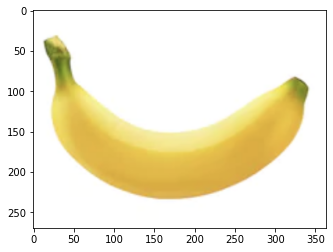

In [14]:
from keras.preprocessing.image import load_img
filenames = os.listdir('dataset/train/freshbanana')
sample = random.choice(filenames)
image = load_img('dataset/train/freshbanana/'+sample)
plt.imshow(image)
print(image.size)

In [15]:
def show_random_images_from(glob_path, seed):
    if seed:
        random.seed(seed)
    r = random.sample(glob(glob_path), 8)
    plt.figure(figsize=(10,6))
    for i, k in enumerate(r):
        plt.subplot(241 + i)
        plt.imshow(Image.open(k))
        plt.axis('off')

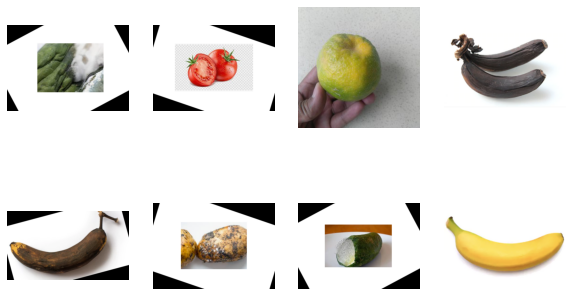

In [16]:
show_random_images_from("dataset/*/*/*", seed=420)

In [17]:
import tensorflow as tf
import keras_preprocessing
from keras_preprocessing import image
from keras_preprocessing.image import ImageDataGenerator

In [24]:
datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=10,  # randomly rotate images 
    zoom_range=0.1,  # randomly zoom image
    width_shift_range=0.1,  # randomly shift images horizontally 
    height_shift_range=0.1,  # randomly shift images vertically 
    horizontal_flip=True,  # randomly flip images horizontally
    fill_mode='nearest') 

train_generator = datagen.flow_from_directory(
    '/content/dataset/train', 
    target_size=(150, 150),
    batch_size=126,
	  class_mode='categorical')

test_generator = datagen.flow_from_directory(
    '/content/dataset/test',
     target_size=(150, 150),
     batch_size=126,
	   class_mode='categorical')

Found 14216 images belonging to 20 classes.
Found 6053 images belonging to 20 classes.


In [25]:
model = tf.keras.models.Sequential()

model.add(tf.keras.layers.Conv2D(64, (3,3),activation='relu', input_shape=(150, 150, 3)))
model.add(tf.keras.layers.MaxPooling2D(2, 2)) 
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(20, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [26]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 148, 148, 64)      1792      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 74, 74, 64)       0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 350464)            0         
                                                                 
 dense_1 (Dense)             (None, 20)                7009300   
                                                                 
Total params: 7,011,092
Trainable params: 7,011,092
Non-trainable params: 0
_________________________________________________________________


In [27]:
history = model.fit(train_generator,
    epochs=10,
    validation_data=test_generator,
    steps_per_epoch=100,
    verbose=1,
    batch_size=64,
    )

Epoch 1/10
100/100 [==============================] - 388s 4s/step - loss: 5.3157 - accuracy: 0.5026 - val_loss: 0.7997 - val_accuracy: 0.7201
Epoch 2/10
100/100 [==============================] - 388s 4s/step - loss: 0.6509 - accuracy: 0.7772 - val_loss: 0.6530 - val_accuracy: 0.7631
Epoch 3/10
100/100 [==============================] - 385s 4s/step - loss: 0.5373 - accuracy: 0.8163 - val_loss: 0.6117 - val_accuracy: 0.7796
Epoch 4/10
100/100 [==============================] - 386s 4s/step - loss: 0.5027 - accuracy: 0.8256 - val_loss: 0.5252 - val_accuracy: 0.8070
Epoch 5/10
100/100 [==============================] - 398s 4s/step - loss: 0.4563 - accuracy: 0.8388 - val_loss: 0.5177 - val_accuracy: 0.8041
Epoch 6/10
100/100 [==============================] - 391s 4s/step - loss: 0.4289 - accuracy: 0.8462 - val_loss: 0.4997 - val_accuracy: 0.8118
Epoch 7/10
100/100 [==============================] - 389s 4s/step - loss: 0.4199 - accuracy: 0.8528 - val_loss: 0.4514 - val_accuracy: 0.8275

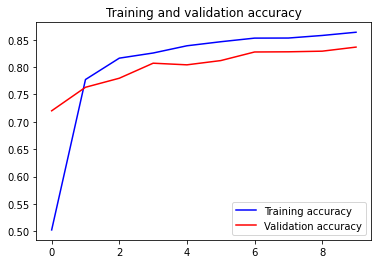

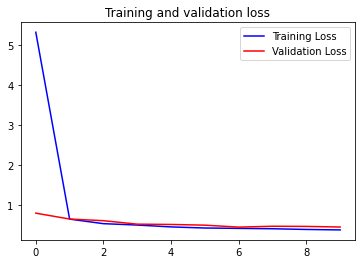

In [28]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'b', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [29]:
scores = model.evaluate(test_generator)
scores = model.evaluate(train_generator)

113/113 [==============================] - 186s 2s/step - loss: 0.3687 - accuracy: 0.8686


# **TRANSFER LEARNING**

In [37]:
from tensorflow.keras.applications import Xception, VGG16, InceptionV3
from tensorflow.keras import layers
from tensorflow.keras import Model
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout, Flatten
import pandas as pd

In [47]:
base_model = InceptionV3(input_shape=(150,150,3),
                          include_top=False)
for layer in base_model.layers:
  layer.trainable = False 

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Flatten()(x)
x = Dense(1024, activation='relu')(x)
x = Dropout(0.2)(x)
# x = Dense(1, activation='sigmoid')(x)
predictions = Dense(len(class_names), activation='softmax')(x)
transfer_model = Model(inputs=base_model.input, outputs=predictions)

transfer_model.compile(optimizer='adam', metrics=['accuracy'], loss='categorical_crossentropy')

In [48]:
transfer_model.fit(
    train_generator, 
    validation_data = test_generator, 
    epochs=3
    )

Epoch 1/3
113/113 [==============================] - 922s 8s/step - loss: 0.7919 - accuracy: 0.7838 - val_loss: 0.3066 - val_accuracy: 0.9005
Epoch 2/3
113/113 [==============================] - 910s 8s/step - loss: 0.2957 - accuracy: 0.8993 - val_loss: 0.2610 - val_accuracy: 0.9119
Epoch 3/3
113/113 [==============================] - 911s 8s/step - loss: 0.2409 - accuracy: 0.9199 - val_loss: 0.2797 - val_accuracy: 0.9067


In [49]:
scores = transfer_model.evaluate(test_generator)
scores = transfer_model.evaluate(train_generator)

113/113 [==============================] - 642s 6s/step - loss: 0.2299 - accuracy: 0.9221


In [71]:
!mkdir random_path
!unzip -j -q data-buah-test.zip -d "/content/random_path"

Prediction for Image Below: freshpotato


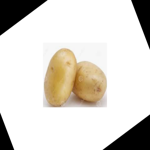

In [151]:
import PIL
import numpy as np

image_path = "/content/dataset/test/freshpotato/p_f001.png"

image = PIL.Image.open(image_path)
image_resized = image.resize((150, 150))
image_array = np.array(image_resized).reshape(1, 150, 150, 3)

print("Prediction for Image Below:", class_names[np.argmax(model.predict(image_array))])
image_resized

In [154]:
model.save('model_V2.h5')
model.save('model_V2')
!zip -r 'model_V2.zip' 'model_V2'

INFO:tensorflow:Assets written to: model_V2/assets


INFO:tensorflow:Assets written to: model_V2/assets


updating: model_V2/ (stored 0%)
updating: model_V2/saved_model.pb (deflated 87%)
updating: model_V2/keras_metadata.pb (deflated 86%)
updating: model_V2/assets/ (stored 0%)
updating: model_V2/variables/ (stored 0%)
updating: model_V2/variables/variables.index (deflated 59%)
updating: model_V2/variables/variables.data-00000-of-00001 (deflated 5%)


In [155]:
import pathlib

converter = tf.lite.TFLiteConverter.from_saved_model('model_V2')

# Set the optimizations
converter.optimizations = [tf.lite.Optimize.DEFAULT]
converter.target_spec.supported_ops = [tf.lite.OpsSet.TFLITE_BUILTINS]

tflite_model = converter.convert()

tflite_model_file = pathlib.Path('./model_V2.tflite')
tflite_model_file.write_bytes(tflite_model)

7014976